In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Read Data

In [2]:
# Memuat dataset dan menampilkan isi
df = pd.read_csv('City_Types.csv')
df

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,Type
0,2024-01-01 00:00:00+00:00,Moscow,208.0,15.9,13.2,44.0,8.6,9.4,Industrial
1,2024-01-01 01:00:00+00:00,Moscow,207.0,17.4,13.7,44.0,8.6,10.5,Industrial
2,2024-01-01 02:00:00+00:00,Moscow,217.0,19.0,15.5,43.0,10.4,12.9,Industrial
3,2024-01-01 03:00:00+00:00,Moscow,231.0,21.0,20.7,36.0,12.3,15.3,Industrial
4,2024-01-01 04:00:00+00:00,Moscow,263.0,34.5,27.2,27.0,13.6,20.0,Industrial
...,...,...,...,...,...,...,...,...,...
52699,2024-12-31 19:00:00+00:00,Stockholm,211.0,20.5,1.1,54.0,4.6,10.6,Residential
52700,2024-12-31 20:00:00+00:00,Stockholm,183.0,10.0,0.6,64.0,2.5,6.0,Residential
52701,2024-12-31 21:00:00+00:00,Stockholm,167.0,5.1,0.4,72.0,2.0,4.4,Residential
52702,2024-12-31 22:00:00+00:00,Stockholm,160.0,3.9,0.3,73.0,1.4,2.6,Residential


# Information from data

In [3]:
# Menampilkan informasi dari  datase
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   City    52704 non-null  object 
 2   CO      52704 non-null  float64
 3   NO2     52704 non-null  float64
 4   SO2     52704 non-null  float64
 5   O3      52704 non-null  float64
 6   PM2.5   52704 non-null  float64
 7   PM10    52704 non-null  float64
 8   Type    52704 non-null  object 
dtypes: float64(6), object(3)
memory usage: 3.6+ MB


# Analysis Deskriptif

In [4]:
# Analysis Deskriptif
df.describe()

,CO,NO2,SO2,O3,PM2.5,PM10
count,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000
mean,508.030472,29.616492,22.387250,53.423668,32.931045,50.644980
std,692.274824,23.984409,34.285823,42.225556,43.833691,67.311502
min,0.000000,0.900000,0.000000,0.000000,0.300000,0.400000
25%,187.000000,11.000000,0.700000,26.000000,6.400000,9.400000
50%,268.000000,23.300000,10.500000,48.000000,14.800000,19.800000
75%,519.000000,42.200000,30.200000,69.000000,42.600000,68.350000
max,12876.000000,218.000000,497.800000,342.000000,459.100000,661.200000


In [5]:
# Cek missing values per fitur
print("\nMissing values per fitur: ")
print(df.isnull().sum())


Missing values per fitur: 
Date     0
City     0
CO       0
NO2      0
SO2      0
O3       0
PM2.5    0
PM10     0
Type     0
dtype: int64


In [6]:
# Cek data duplikat
print("\nJumlah data duplikat: ", df.duplicated().sum())


Jumlah data duplikat:  0


## Data Visualization

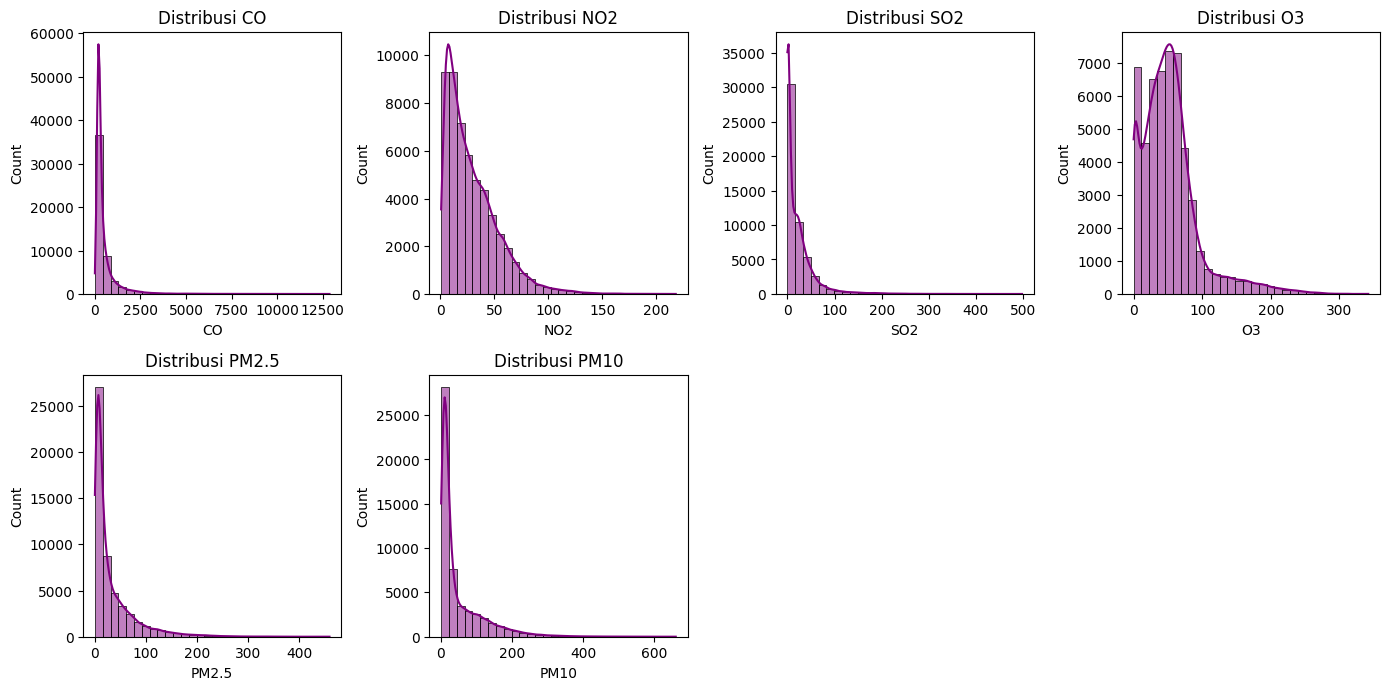

In [7]:
# Ditribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='purple')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

/tmp/ipython-input-8-145008007.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipython-input-8-145008007.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipython-input-8-145008007.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')


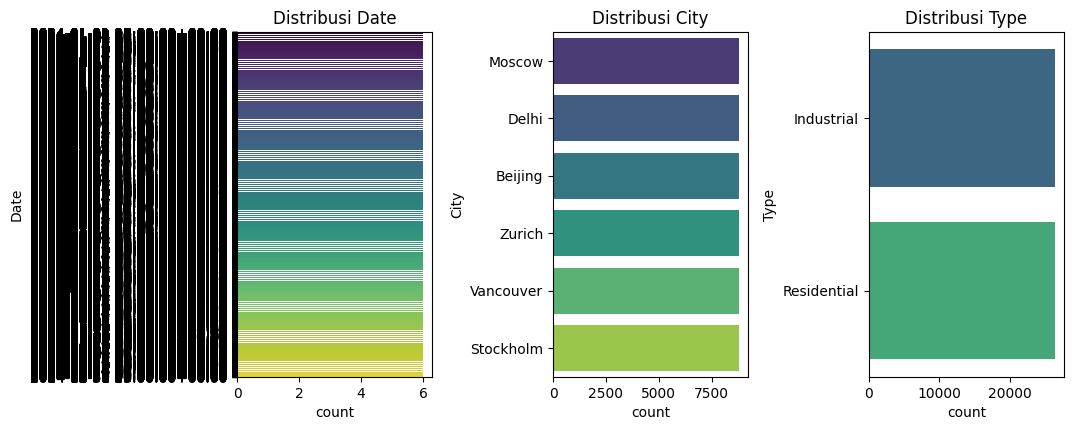

In [8]:
# Distribusi fitur kategorikal
cat_features = df.select_dtypes(include=['object'])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

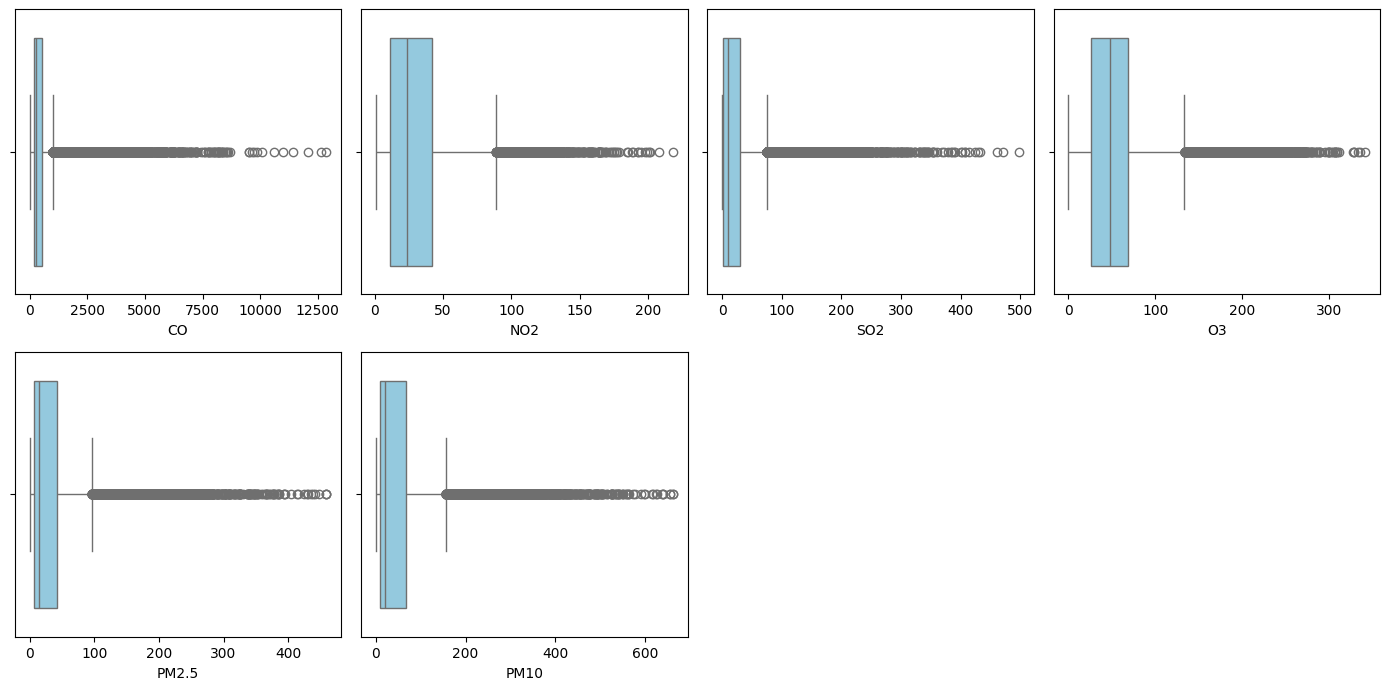

In [9]:
# Cek outlier pada dataset
num_features = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[column], color='skyblue')

plt.tight_layout()
plt.show()

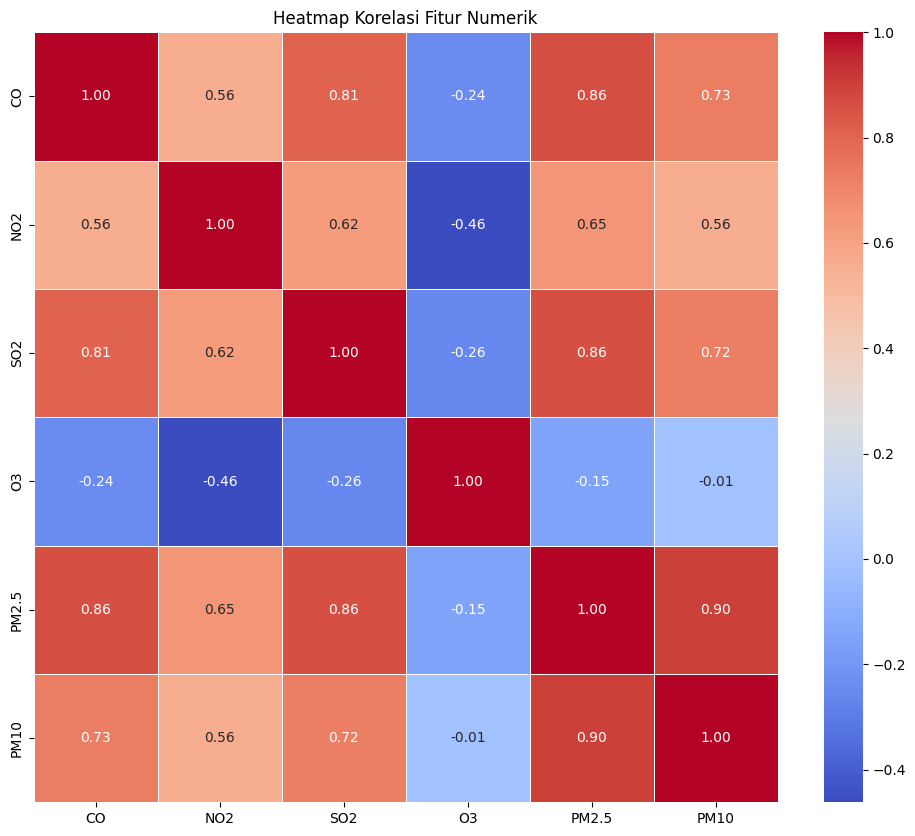

In [10]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

/tmp/ipython-input-15-417210954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='viridis')


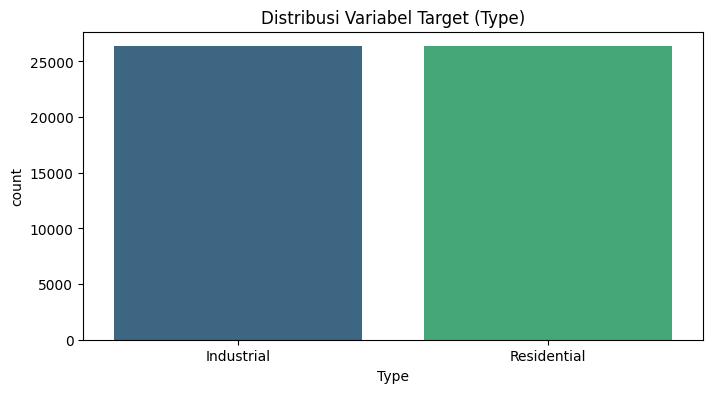

In [15]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Type', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (Type)')
plt.show()

# Drop out Column

In [13]:
# Menghapus fitur 'Date','City' dari dataset
df = df.drop(['Date', 'City'],axis=1)
df

,CO,NO2,SO2,O3,PM2.5,PM10,Type
0,208.0,15.9,13.2,44.0,8.6,9.4,Industrial
1,207.0,17.4,13.7,44.0,8.6,10.5,Industrial
2,217.0,19.0,15.5,43.0,10.4,12.9,Industrial
3,231.0,21.0,20.7,36.0,12.3,15.3,Industrial
4,263.0,34.5,27.2,27.0,13.6,20.0,Industrial
...,...,...,...,...,...,...,...
52699,211.0,20.5,1.1,54.0,4.6,10.6,Residential
52700,183.0,10.0,0.6,64.0,2.5,6.0,Residential
52701,167.0,5.1,0.4,72.0,2.0,4.4,Residential
52702,160.0,3.9,0.3,73.0,1.4,2.6,Residential


# Encoding Categorical target

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# List kolom kategorikal yang perlu di encode
categorical_columns = ['Type']

# Encode kolom kategorikal
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])

In [19]:
df

,CO,NO2,SO2,O3,PM2.5,PM10,Type
0,208.0,15.9,13.2,44.0,8.6,9.4,0
1,207.0,17.4,13.7,44.0,8.6,10.5,0
2,217.0,19.0,15.5,43.0,10.4,12.9,0
3,231.0,21.0,20.7,36.0,12.3,15.3,0
4,263.0,34.5,27.2,27.0,13.6,20.0,0
...,...,...,...,...,...,...,...
52699,211.0,20.5,1.1,54.0,4.6,10.6,1
52700,183.0,10.0,0.6,64.0,2.5,6.0,1
52701,167.0,5.1,0.4,72.0,2.0,4.4,1
52702,160.0,3.9,0.3,73.0,1.4,2.6,1


# Splitting data and Scaling

In [20]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Type'])
y = df['Type']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat instance Standardisasi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit dan transform data pelatihan
X_train_scaled = scaler.fit_transform(X_train)

# Transform data uji
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train_scaled.shape

(42163, 6)

In [24]:
X_test_scaled.shape

(10541, 6)

In [27]:
y_train

,Type
9036,0
33745,1
12969,0
28691,1
42610,1
...,...
11284,0
44732,1
38158,1
860,0


# Modeling

In [33]:
# Implementasi model Stacking
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Mendefinisikan base models
base_learners = [
    ('svc', SVC()),
    ('abc', AdaBoostClassifier()),
    ('xgb', XGBClassifier()),
    ('rf', RandomForestClassifier()),
    ('mlp', MLPClassifier())
]

# Mendefinisikan meta-model
meta_model = LogisticRegression(random_state=42)

# Mendefinisikan StackingClassifier
stacking_model = StackingClassifier(
    estimators=base_learners, final_estimator=meta_model
)

# Melatih Stacking model
stacking_model.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('svc', SVC()), ('abc', AdaBoostClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('rf', RandomForestClassifier()),
                               ('mlp', MLPClassifier())],
                   final_estimator=LogisticRegression(random_state=42))

In [34]:
# Melakukan prediksi pada data pelatihan dan uji
y_pred_train = stacking_model.predict(X_train_scaled)
y_pred_test = stacking_model.predict(X_test_scaled)

# Evaluasi akurasi model
accuracy_train_stacking = accuracy_score(y_train, y_pred_train)
accuracy_test_stacking = accuracy_score(y_test, y_pred_test)

# Menampilkan hasil akurasi
print("Stacking - Accuracy train: ",accuracy_train_stacking )
print("Stacking - Accuracy test: ",accuracy_test_stacking )

Stacking - Accuracy train:  0.9988615610843631
Stacking - Accuracy test:  0.9889953514846789
